In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Input, Convolution1D, BatchNormalization, MaxPool1D, Flatten, Dense, concatenate
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense, concatenate, Attention
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from keras.regularizers import l1
from keras.losses import mean_squared_error,mean_absolute_error,CategoricalCrossentropy
from keras.optimizers import Adam,Nadam, RMSprop,Adamax,Adagrad

df = pd.DataFrame()
mypath = 'NEW_BASE_DATASET_WITH_DISTANCE1.csv'
df = pd.read_csv(mypath)


from sklearn.utils import resample
df_1=df[df["label"]==1]
df_2=df[df["label"]==2]
df_0=(df[df["label"]==0]).sample(n=1400,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=1400,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=1400,random_state=123)
df=pd.concat([df_0,df_1_upsample,df_2_upsample])

# Drop unnecessary columns
df = df.drop(['Id','eventID','hr','max_acceleration','std_deviation','overall_distance'], axis=1)

# Split the dataframe into acceleration and heart rate data
acceleration_data = df.iloc[:, :125].values
heart_rate_data = df.iloc[:, 125:].values

# Split the data into train and test sets
X_acceleration_train, X_acceleration_test, X_heart_rate_train, X_heart_rate_test, y_train, y_test = train_test_split(
    acceleration_data, heart_rate_data, df["label"], test_size=0.2, random_state=333)

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the data for convolutional layers
X_acceleration_train = X_acceleration_train.reshape(len(X_acceleration_train), X_acceleration_train.shape[1], 1)
X_acceleration_test = X_acceleration_test.reshape(len(X_acceleration_test), X_acceleration_test.shape[1], 1)
X_heart_rate_train = X_heart_rate_train.reshape(len(X_heart_rate_train), X_heart_rate_train.shape[1], 1)
X_heart_rate_test = X_heart_rate_test.reshape(len(X_heart_rate_test), X_heart_rate_test.shape[1], 1)

In [1]:
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from sklearn.utils import class_weight
import warnings
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense, BatchNormalization
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from keras.layers import Input, Convolution1D, BatchNormalization, MaxPool1D, Flatten, Dense, concatenate
from keras.models import Model
from keras.optimizers import RMSprop
from keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import numpy as np
# Import necessary libraries
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from keras.utils import to_categorical
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense, concatenate, Attention
from keras.models import Model
from keras.optimizers import RMSprop
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
from keras.regularizers import l1
from keras.losses import mean_squared_error,mean_absolute_error,CategoricalCrossentropy
from keras.optimizers import Adam,Nadam, RMSprop,Adamax,Adagrad
import scipy


df = pd.DataFrame()
mypath = 'NEW_BASE_DATASET_WITH_DISTANCE1.csv'
df = pd.read_csv(mypath)


from sklearn.utils import resample
df_1=df[df["label"]==1]
df_2=df[df["label"]==2]
df_0=(df[df["label"]==0]).sample(n=1400,random_state=42)

df_1_upsample=resample(df_1,replace=True,n_samples=1400,random_state=123)
df_2_upsample=resample(df_2,replace=True,n_samples=1400,random_state=123)
df=pd.concat([df_0,df_1_upsample,df_2_upsample])

In [16]:
# Assuming you have defined or imported necessary libraries and functions

# Split the dataframe into acceleration, heart rate, distance, max acceleration, and std deviation data
acceleration_data = df.iloc[:, :125].values
heart_rate_data = df.iloc[:, 125:250].values
overall_distance_data = df["overall_distance"].values.reshape(-1, 1)  # Assuming distance is a single value for each sample
max_acceleration_data = df["max_acceleration"].values.reshape(-1, 1)  # Assuming max acceleration is a single value for each sample
std_deviation_data = df["std_deviation"].values.reshape(-1, 1)  # Assuming std deviation is a single value for each sample

# Combine all features
input_data = np.concatenate((acceleration_data, heart_rate_data, overall_distance_data, max_acceleration_data, std_deviation_data), axis=1)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(
    input_data, df["label"], test_size=0.2, random_state=333)  # Updated to include all features

# Convert labels to categorical
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

# Reshape the acceleration data for convolutional layers
X_acceleration_train = X_train[:, :125].reshape(len(X_train), 125, 1)
X_acceleration_test = X_test[:, :125].reshape(len(X_test), 125, 1)

# Reshape the heart rate data for convolutional layers
X_heart_rate_train = X_train[:, 125:250].reshape(len(X_train), 125, 1)
X_heart_rate_test = X_test[:, 125:250].reshape(len(X_test), 125, 1)


# Now you can proceed with creating the model


In [17]:
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense, BatchNormalization, Concatenate
from keras.models import Model
from keras.optimizers import RMSprop
import keras

def create_model(input_shape_acceleration, input_shape_heart_rate):
    # Acceleration branch
    acceleration_input = Input(shape=input_shape_acceleration, name='acceleration_input')
    conv1_acc = Convolution1D(64, (6), activation='relu')(acceleration_input)
    conv1_acc = BatchNormalization()(conv1_acc)  # Add batch normalization
    pool1_acc = MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_acc)
    conv2_acc = Convolution1D(64, (3), activation='relu')(pool1_acc)
    conv2_acc = BatchNormalization()(conv2_acc)  # Add batch normalization
    pool2_acc = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_acc)
    conv3_acc = Convolution1D(64, (3), activation='relu')(pool2_acc)
    conv3_acc = BatchNormalization()(conv3_acc)  # Add batch normalization
    pool3_acc = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_acc)
    attention_acc = keras.layers.Attention()([pool3_acc, pool3_acc])  # Add attention mechanism
    flatten_acc = Flatten()(attention_acc)

    # Heart rate branch
    heart_rate_input = Input(shape=input_shape_heart_rate, name='heart_rate_input')
    conv1_hr = Convolution1D(64, (6), activation='relu')(heart_rate_input)
    conv1_hr = BatchNormalization()(conv1_hr)  # Add batch normalization
    pool1_hr = MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_hr)
    conv2_hr = Convolution1D(64, (3), activation='relu')(pool1_hr)
    conv2_hr = BatchNormalization()(conv2_hr)  # Add batch normalization
    pool2_hr = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_hr)
    conv3_hr = Convolution1D(64, (3), activation='relu')(pool2_hr)
    conv3_hr = BatchNormalization()(conv3_hr)  # Add batch normalization
    pool3_hr = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_hr)
    attention_hr = keras.layers.Attention()([pool3_hr, pool3_hr])  # Add attention mechanism
    flatten_hr = Flatten()(attention_hr)

    # Define additional inputs for max acceleration, std deviation, and overall distance
    max_acceleration_input = Input(shape=(1,), name='max_acceleration_input')
    std_deviation_input = Input(shape=(1,), name='std_deviation_input')
    overall_distance_input = Input(shape=(1,), name='overall_distance_input')

    # Concatenate all features
    all_features = Concatenate(axis=1)([flatten_acc, flatten_hr, max_acceleration_input, std_deviation_input, overall_distance_input])

    # Dense layers or any other layers you want to add
    dense_layer1 = Dense(units=64, activation='relu')(all_features)
    dense_layer2 = Dense(units=32, activation='relu')(dense_layer1)
    output_layer = Dense(units=1, activation='sigmoid')(dense_layer2)

    # Define model
    model = Model(inputs=[acceleration_input, heart_rate_input, max_acceleration_input, std_deviation_input, overall_distance_input], outputs=output_layer)


    # Compile model
    optimizer = RMSprop(learning_rate=0.0001)  # Set custom learning rate
    model.compile(optimizer=optimizer, loss='categorical_crossentropy', metrics=['accuracy'])


    return model

# Assuming input shapes for acceleration and heart rate data
input_shape_acceleration = (X_acceleration_train.shape[1], 1)
input_shape_heart_rate = (X_heart_rate_train.shape[1], 1)

# Create the model
model = create_model(input_shape_acceleration, input_shape_heart_rate)

# Print model summary
model.summary()


from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense, concatenate, Attention, Dropout
import matplotlib.pyplot as plt

# Convert one-hot encoded labels back to class labels
label_encoder = LabelEncoder()
fold_histories = []  # Initialize an empty list to store fold histories
y_train_labels = label_encoder.fit_transform(np.argmax(y_train, axis=1))

k = 5  # Number of folds

# Define K-fold cross-validation
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=333)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_acceleration_train, y_train_labels)):
    print(f"Fold {fold + 1}/{k}")
    
    # Assuming you have already split your data into train and test sets
    # Define X_distance_train, X_max_acceleration_train, and X_std_deviation_train
    X_distance_train = df["overall_distance"].values.reshape(-1, 1)
    X_max_acceleration_train = df["max_acceleration"].values.reshape(-1, 1)
    X_std_deviation_train = df["std_deviation"].values.reshape(-1, 1)

    # Split data into train and validation sets for this fold
    X_fold_train_acceleration, X_fold_val_acceleration = X_acceleration_train[train_index], X_acceleration_train[test_index]
    X_fold_train_heart_rate, X_fold_val_heart_rate = X_heart_rate_train[train_index], X_heart_rate_train[test_index]
    X_fold_train_distance, X_fold_val_distance = X_distance_train[train_index], X_distance_train[test_index]
    X_fold_train_max_acceleration, X_fold_val_max_acceleration = X_max_acceleration_train[train_index], X_max_acceleration_train[test_index]
    X_fold_train_std_deviation, X_fold_val_std_deviation = X_std_deviation_train[train_index], X_std_deviation_train[test_index]
    


    
    y_fold_train, y_fold_val = y_train[train_index], y_train[test_index]

    # Create and compile the model
    model = create_model(input_shape_acceleration, input_shape_heart_rate, input_shape_distance, input_shape_max_acceleration, input_shape_std_deviation)

    # Fit the model and store the training history
    history = model.fit([X_fold_train_acceleration, X_fold_train_heart_rate, X_fold_train_distance, X_fold_train_max_acceleration, X_fold_train_std_deviation], 
                        y_fold_train,
                        epochs=10, batch_size=36,
                        validation_data=([X_fold_val_acceleration, X_fold_val_heart_rate, X_fold_val_distance, X_fold_val_max_acceleration, X_fold_val_std_deviation], y_fold_val),
                        verbose=0)  # Set verbose to 0 to suppress training log

    # Store the training history for this fold
    fold_histories.append(history)

    # Plot training loss and accuracy for this fold
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - Fold {fold + 1}')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy - Fold {fold + 1}')
    plt.legend()
    plt.show()



Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
acceleration_input (InputLayer) [(None, 125, 1)]     0                                            
__________________________________________________________________________________________________
heart_rate_input (InputLayer)   [(None, 125, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_9 (Conv1D)               (None, 120, 64)      448         acceleration_input[0][0]         
__________________________________________________________________________________________________
conv1d_12 (Conv1D)              (None, 120, 64)      448         heart_rate_input[0][0]           
____________________________________________________________________________________________

In [26]:
from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense, concatenate, Attention, Dropout
import matplotlib.pyplot as plt

# Convert one-hot encoded labels back to class labels
label_encoder = LabelEncoder()
fold_histories = []  # Initialize an empty list to store fold histories
y_train_labels = label_encoder.fit_transform(np.argmax(y_train, axis=1))

k = 5  # Number of folds

# Define K-fold cross-validation
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=333)

# Iterate over each fold
for fold, (train_index, test_index) in enumerate(kf.split(X_acceleration_train, y_train_labels)):
    print(f"Fold {fold + 1}/{k}")
    
    # Assuming you have already split your data into train and test sets
    # Define X_distance_train, X_max_acceleration_train, and X_std_deviation_train
    X_distance_train = df["overall_distance"].values.reshape(-1, 1)
    X_max_acceleration_train = df["max_acceleration"].values.reshape(-1, 1)
    X_std_deviation_train = df["std_deviation"].values.reshape(-1, 1)

    # Split data into train and validation sets for this fold
    X_fold_train_acceleration, X_fold_val_acceleration = X_acceleration_train[train_index], X_acceleration_train[test_index]
    X_fold_train_heart_rate, X_fold_val_heart_rate = X_heart_rate_train[train_index], X_heart_rate_train[test_index]
    X_fold_train_distance, X_fold_val_distance = X_distance_train[train_index], X_distance_train[test_index]
    X_fold_train_max_acceleration, X_fold_val_max_acceleration = X_max_acceleration_train[train_index], X_max_acceleration_train[test_index]
    X_fold_train_std_deviation, X_fold_val_std_deviation = X_std_deviation_train[train_index], X_std_deviation_train[test_index]
    


    
    y_fold_train, y_fold_val = y_train[train_index], y_train[test_index]

    # Create and compile the model
    model = create_model(input_shape_acceleration, input_shape_heart_rate, input_shape_distance, input_shape_max_acceleration, input_shape_std_deviation)

    # Fit the model and store the training history
    history = model.fit([X_fold_train_acceleration, X_fold_train_heart_rate, X_fold_train_distance, X_fold_train_max_acceleration, X_fold_train_std_deviation], 
                        y_fold_train,
                        epochs=10, batch_size=36,
                        validation_data=([X_fold_val_acceleration, X_fold_val_heart_rate, X_fold_val_distance, X_fold_val_max_acceleration, X_fold_val_std_deviation], y_fold_val),
                        verbose=0)  # Set verbose to 0 to suppress training log

    # Store the training history for this fold
    fold_histories.append(history)

    # Plot training loss and accuracy for this fold
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - Fold {fold + 1}')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy - Fold {fold + 1}')
    plt.legend()
    plt.show()


Fold 1/5


NameError: name 'input_shape_distance' is not defined

Model: "model_74"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
acceleration_input (InputLayer) [(None, 125, 1)]     0                                            
__________________________________________________________________________________________________
heart_rate_input (InputLayer)   [(None, 125, 1)]     0                                            
__________________________________________________________________________________________________
conv1d_453 (Conv1D)             (None, 120, 24)      168         acceleration_input[0][0]         
__________________________________________________________________________________________________
conv1d_456 (Conv1D)             (None, 120, 24)      168         heart_rate_input[0][0]           
___________________________________________________________________________________________

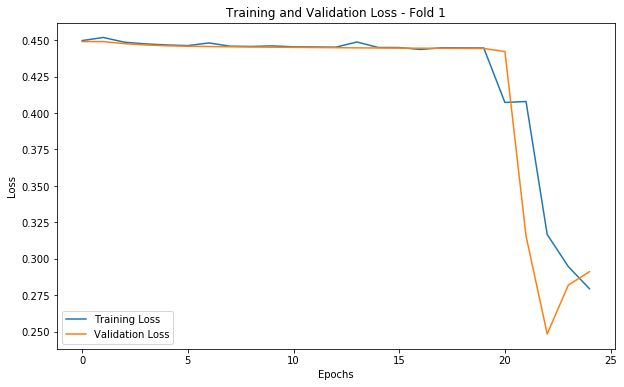

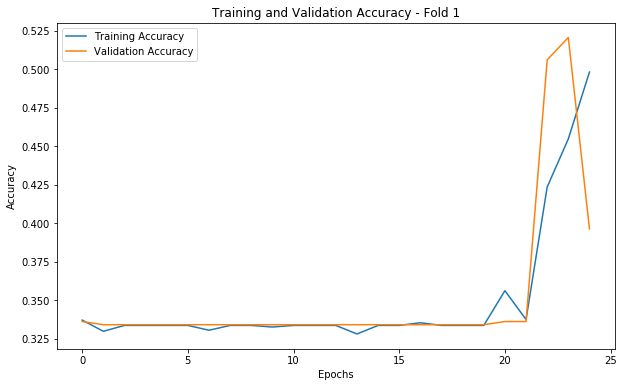

Fold 2/7
Epoch 1/25
90/90 [==============================] - 4s 21ms/step - loss: 0.4527 - accuracy: 0.3336 - val_loss: 0.4481 - val_accuracy: 0.3375
Epoch 2/25
90/90 [==============================] - 2s 18ms/step - loss: 0.4538 - accuracy: 0.3283 - val_loss: 0.4462 - val_accuracy: 0.3375
Epoch 3/25
90/90 [==============================] - 2s 20ms/step - loss: 0.4477 - accuracy: 0.3348 - val_loss: 0.4450 - val_accuracy: 0.3375
Epoch 4/25
90/90 [==============================] - 2s 20ms/step - loss: 0.4499 - accuracy: 0.3297 - val_loss: 0.4441 - val_accuracy: 0.3375
Epoch 5/25
90/90 [==============================] - 2s 21ms/step - loss: 0.4571 - accuracy: 0.3176 - val_loss: 0.4437 - val_accuracy: 0.3375
Epoch 6/25
90/90 [==============================] - 2s 18ms/step - loss: 0.4375 - accuracy: 0.3466 - val_loss: 0.4435 - val_accuracy: 0.3375
Epoch 7/25
90/90 [==============================] - 2s 22ms/step - loss: 0.4447 - accuracy: 0.3355 - val_loss: 0.4433 - val_accuracy: 0.3375
Epoc

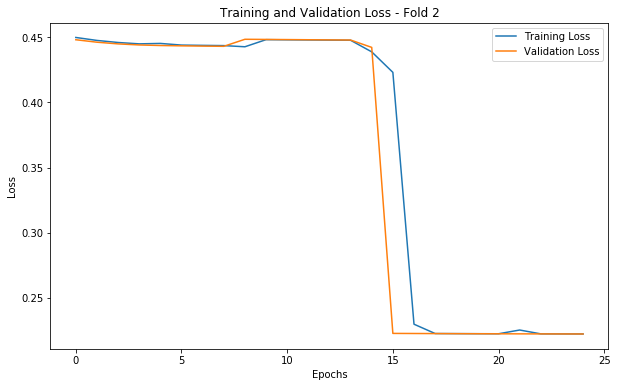

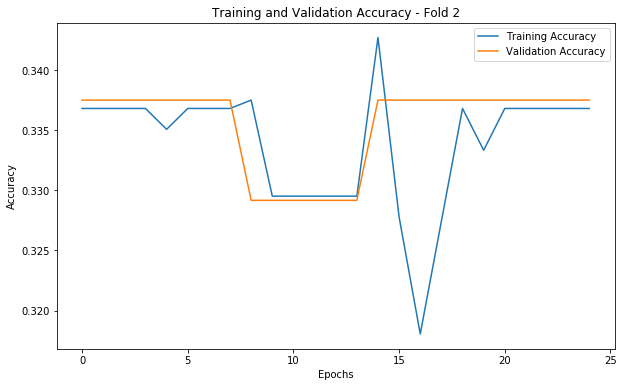

Fold 3/7
Epoch 1/25
90/90 [==============================] - 4s 21ms/step - loss: 0.4525 - accuracy: 0.3340 - val_loss: 0.4482 - val_accuracy: 0.3375
Epoch 2/25
90/90 [==============================] - 2s 18ms/step - loss: 0.4370 - accuracy: 0.3535 - val_loss: 0.4463 - val_accuracy: 0.3375
Epoch 3/25
90/90 [==============================] - 2s 18ms/step - loss: 0.4363 - accuracy: 0.3519 - val_loss: 0.4450 - val_accuracy: 0.3375
Epoch 4/25
90/90 [==============================] - 2s 20ms/step - loss: 0.4512 - accuracy: 0.3280 - val_loss: 0.4498 - val_accuracy: 0.3292
Epoch 5/25
90/90 [==============================] - 2s 18ms/step - loss: 0.4468 - accuracy: 0.3336 - val_loss: 0.4494 - val_accuracy: 0.3292
Epoch 6/25
90/90 [==============================] - 2s 18ms/step - loss: 0.4529 - accuracy: 0.3237 - val_loss: 0.4491 - val_accuracy: 0.3292
Epoch 7/25
90/90 [==============================] - 2s 20ms/step - loss: 0.4520 - accuracy: 0.3247 - val_loss: 0.4489 - val_accuracy: 0.3292
Epoc

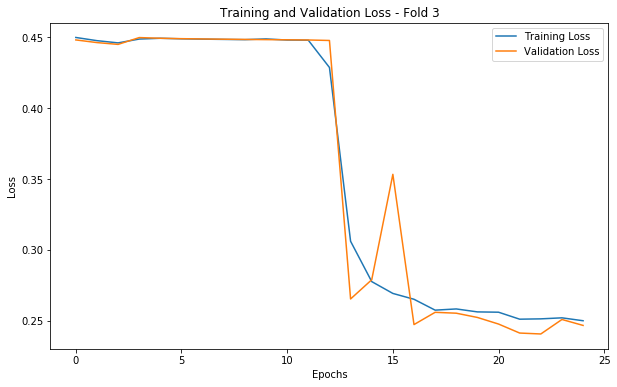

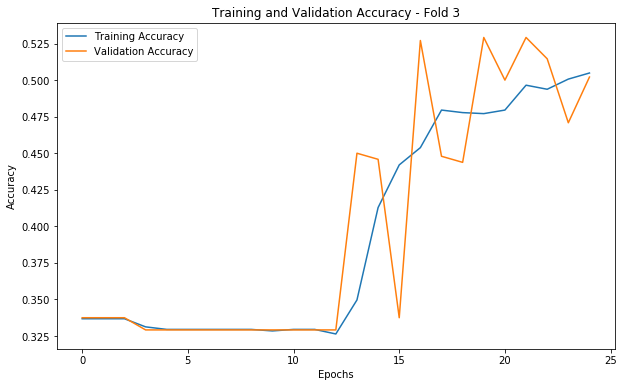

Fold 4/7
Epoch 1/25
90/90 [==============================] - 5s 24ms/step - loss: 0.4542 - accuracy: 0.3316 - val_loss: 0.4511 - val_accuracy: 0.3333
Epoch 2/25
90/90 [==============================] - 2s 20ms/step - loss: 0.4555 - accuracy: 0.3259 - val_loss: 0.4492 - val_accuracy: 0.3333
Epoch 3/25
90/90 [==============================] - 2s 21ms/step - loss: 0.4447 - accuracy: 0.3395 - val_loss: 0.4479 - val_accuracy: 0.3333
Epoch 4/25
90/90 [==============================] - 2s 21ms/step - loss: 0.4516 - accuracy: 0.3274 - val_loss: 0.4499 - val_accuracy: 0.3292
Epoch 5/25
90/90 [==============================] - 2s 21ms/step - loss: 0.4476 - accuracy: 0.3323 - val_loss: 0.4494 - val_accuracy: 0.3292
Epoch 6/25
90/90 [==============================] - 2s 22ms/step - loss: 0.4552 - accuracy: 0.3203 - val_loss: 0.4491 - val_accuracy: 0.3292
Epoch 7/25
90/90 [==============================] - 2s 21ms/step - loss: 0.4529 - accuracy: 0.3233 - val_loss: 0.4489 - val_accuracy: 0.3292
Epoc

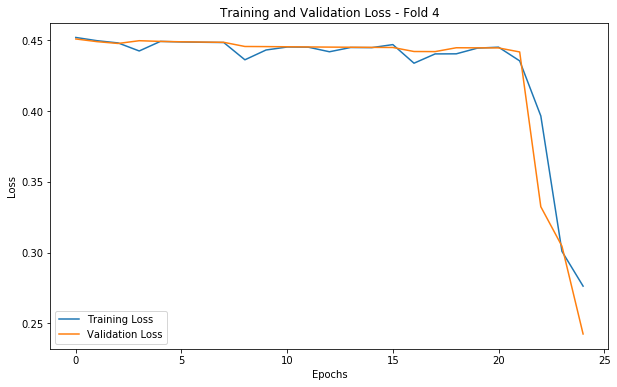

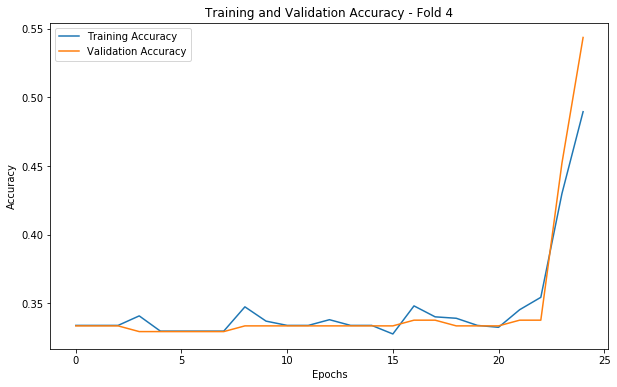

Fold 5/7
Epoch 1/25
90/90 [==============================] - 5s 25ms/step - loss: 0.4514 - accuracy: 0.3360 - val_loss: 0.4484 - val_accuracy: 0.3375
Epoch 2/25
90/90 [==============================] - 2s 21ms/step - loss: 0.4554 - accuracy: 0.3262 - val_loss: 0.4465 - val_accuracy: 0.3375
Epoch 3/25
90/90 [==============================] - 2s 20ms/step - loss: 0.4483 - accuracy: 0.3342 - val_loss: 0.4452 - val_accuracy: 0.3375
Epoch 4/25
90/90 [==============================] - 2s 22ms/step - loss: 0.4339 - accuracy: 0.3541 - val_loss: 0.4443 - val_accuracy: 0.3375
Epoch 5/25
90/90 [==============================] - 2s 20ms/step - loss: 0.4432 - accuracy: 0.3390 - val_loss: 0.4494 - val_accuracy: 0.3292
Epoch 6/25
90/90 [==============================] - 2s 22ms/step - loss: 0.4493 - accuracy: 0.3292 - val_loss: 0.4491 - val_accuracy: 0.3292
Epoch 7/25
90/90 [==============================] - 2s 20ms/step - loss: 0.4454 - accuracy: 0.3345 - val_loss: 0.4489 - val_accuracy: 0.3292
Epoc

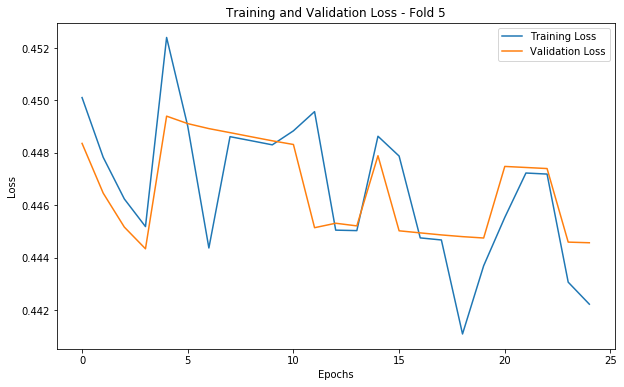

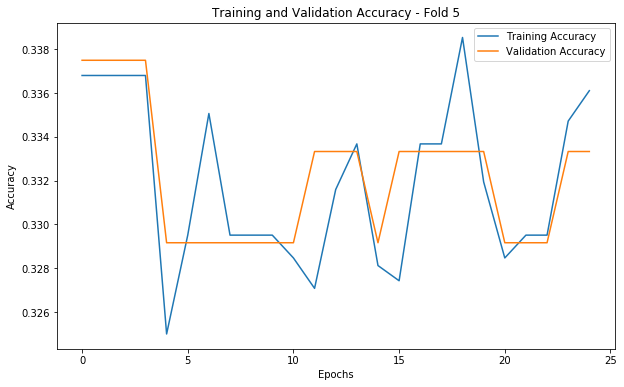

Fold 6/7
Epoch 1/25
91/91 [==============================] - 4s 21ms/step - loss: 0.4493 - accuracy: 0.3388 - val_loss: 0.4491 - val_accuracy: 0.3361
Epoch 2/25
91/91 [==============================] - 2s 18ms/step - loss: 0.4643 - accuracy: 0.3125 - val_loss: 0.4472 - val_accuracy: 0.3361
Epoch 3/25
91/91 [==============================] - 2s 19ms/step - loss: 0.4518 - accuracy: 0.3287 - val_loss: 0.4502 - val_accuracy: 0.3299
Epoch 4/25
91/91 [==============================] - 2s 18ms/step - loss: 0.4480 - accuracy: 0.3329 - val_loss: 0.4495 - val_accuracy: 0.3299
Epoch 5/25
91/91 [==============================] - 2s 20ms/step - loss: 0.4495 - accuracy: 0.3296 - val_loss: 0.4490 - val_accuracy: 0.3299
Epoch 6/25
91/91 [==============================] - 2s 17ms/step - loss: 0.4538 - accuracy: 0.3225 - val_loss: 0.4487 - val_accuracy: 0.3299
Epoch 7/25
91/91 [==============================] - 2s 19ms/step - loss: 0.4567 - accuracy: 0.3178 - val_loss: 0.4485 - val_accuracy: 0.3299
Epoc

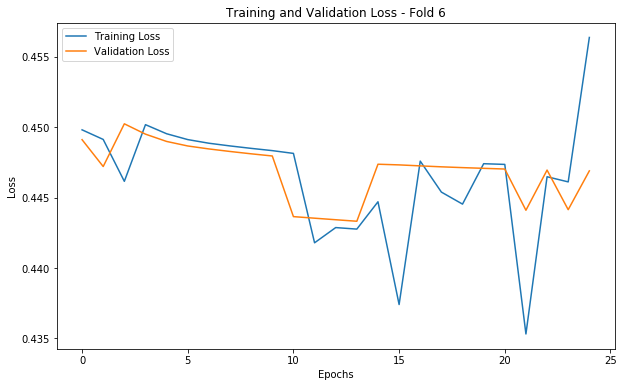

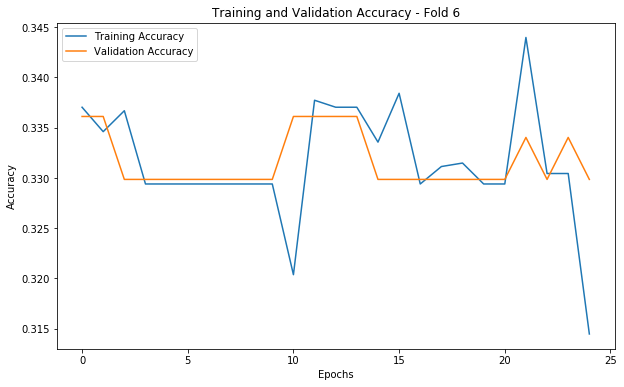

Fold 7/7
Epoch 1/25
91/91 [==============================] - 4s 21ms/step - loss: 0.4574 - accuracy: 0.3269 - val_loss: 0.4493 - val_accuracy: 0.3361
Epoch 2/25
91/91 [==============================] - 2s 23ms/step - loss: 0.4583 - accuracy: 0.3218 - val_loss: 0.4474 - val_accuracy: 0.3361
Epoch 3/25
91/91 [==============================] - 2s 20ms/step - loss: 0.4546 - accuracy: 0.3248 - val_loss: 0.4461 - val_accuracy: 0.3361
Epoch 4/25
91/91 [==============================] - 2s 21ms/step - loss: 0.4535 - accuracy: 0.3246 - val_loss: 0.4452 - val_accuracy: 0.3361
Epoch 5/25
91/91 [==============================] - 2s 19ms/step - loss: 0.4475 - accuracy: 0.3325 - val_loss: 0.4448 - val_accuracy: 0.3361
Epoch 6/25
91/91 [==============================] - 2s 19ms/step - loss: 0.4450 - accuracy: 0.3357 - val_loss: 0.4445 - val_accuracy: 0.3361
Epoch 7/25
91/91 [==============================] - 2s 18ms/step - loss: 0.4508 - accuracy: 0.3266 - val_loss: 0.4443 - val_accuracy: 0.3361
Epoc

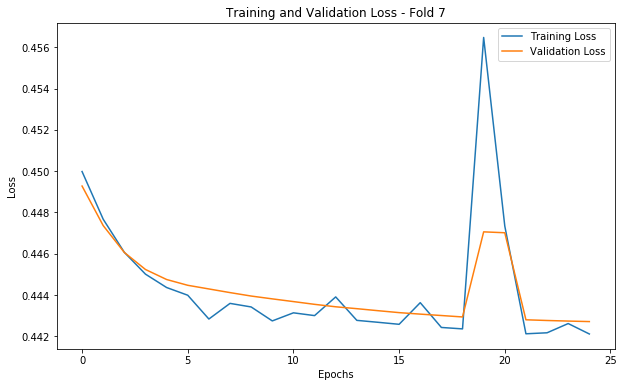

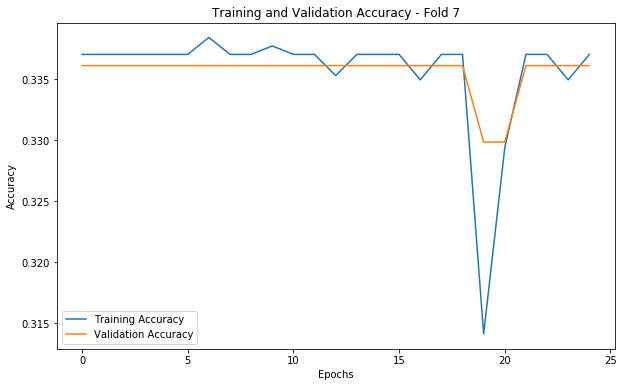

In [62]:
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense, BatchNormalization, Concatenate
from keras.models import Model
from keras.optimizers import RMSprop
import keras
from keras.regularizers import l1, l2
from keras.optimizers import Ftrl



def create_model(input_shape_acceleration, input_shape_heart_rate, input_shape_distance, input_shape_max_acceleration, input_shape_std_deviation):
    # Acceleration branch
    acceleration_input = Input(shape=input_shape_acceleration, name='acceleration_input')
    conv1_acc = Convolution1D(24, (6), activation='relu')(acceleration_input)
    conv1_acc = BatchNormalization()(conv1_acc)  # Add batch normalization
    pool1_acc = MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_acc)
    conv2_acc = Convolution1D(32, (3), activation='relu')(pool1_acc)
    conv2_acc = BatchNormalization()(conv2_acc)  # Add batch normalization
    pool2_acc = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_acc)
    conv3_acc = Convolution1D(64, (3), activation='relu')(pool2_acc)
    conv3_acc = BatchNormalization()(conv3_acc)  # Add batch normalization
    pool3_acc = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_acc)
    attention_acc = keras.layers.Attention()([pool3_acc, pool3_acc])  # Add attention mechanism
    flatten_acc = Flatten()(attention_acc)

    # Heart rate branch
    heart_rate_input = Input(shape=input_shape_heart_rate, name='heart_rate_input')
    conv1_hr = Convolution1D(24, (6), activation='relu')(heart_rate_input)
    conv1_hr = BatchNormalization()(conv1_hr)  # Add batch normalization
    pool1_hr = MaxPool1D(pool_size=(3), strides=(2), padding="same")(conv1_hr)
    conv2_hr = Convolution1D(32, (3), activation='relu')(pool1_hr)
    conv2_hr = BatchNormalization()(conv2_hr)  # Add batch normalization
    pool2_hr = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv2_hr)
    conv3_hr = Convolution1D(64, (3), activation='relu')(pool2_hr)
    conv3_hr = BatchNormalization()(conv3_hr)  # Add batch normalization
    pool3_hr = MaxPool1D(pool_size=(2), strides=(2), padding="same")(conv3_hr)
    attention_hr = keras.layers.Attention()([pool3_hr, pool3_hr])  # Add attention mechanism
    flatten_hr = Flatten()(attention_hr)

    # Define additional inputs for max acceleration, std deviation, and overall distance
    max_acceleration_input = Input(shape=(1,), name='max_acceleration_input')
    std_deviation_input = Input(shape=( 1,), name='std_deviation_input')
    overall_distance_input = Input(shape=(1,), name='overall_distance_input')

    # Concatenate all features
    all_features = Concatenate(axis=1)([flatten_acc, flatten_hr, max_acceleration_input, std_deviation_input, overall_distance_input])

    # Dense layers or any other layers you want to add
    dense_layer1 = Dense(units=32, activation='relu', kernel_regularizer=l2(0.0001))(all_features)  # Example of adding L2 regularization
    dense_layer2 = Dense(units=32, activation='relu', kernel_regularizer=l2(0.0001))(dense_layer1)  # Example of adding L2 regularization
    output_layer = Dense(units=3, activation='softmax')(dense_layer2)

    # Define model
    model = Model(inputs=[acceleration_input, heart_rate_input, max_acceleration_input, std_deviation_input, overall_distance_input], outputs=output_layer)


    # Compile model
    optimizer = RMSprop(learning_rate=0.0001)  # Set custom learning rate
    model.compile(optimizer=optimizer, loss='mean_squared_error', metrics=['accuracy'])

    return model


# Assuming input shapes for all features
input_shape_acceleration = (X_acceleration_train.shape[1], 1)
input_shape_heart_rate = (X_heart_rate_train.shape[1], 1)
input_shape_distance = (X_distance_train.shape[1], 1)
input_shape_max_acceleration = (X_max_acceleration_train.shape[1], 1)
input_shape_std_deviation = (X_std_deviation_train.shape[1], 1)

# Create the model
model = create_model(input_shape_acceleration, input_shape_heart_rate, input_shape_distance, input_shape_max_acceleration, input_shape_std_deviation)

# Print model summary
print(model.summary())


from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import LabelEncoder
import numpy as np
from tensorflow.keras.callbacks import ModelCheckpoint, ReduceLROnPlateau, EarlyStopping
from keras.layers import Input, Convolution1D, MaxPool1D, Flatten, Dense, concatenate, Attention, Dropout
import matplotlib.pyplot as plt

# Convert one-hot encoded labels back to class labels
label_encoder = LabelEncoder()
fold_histories = []  # Initialize an empty list to store fold histories
y_train_labels = label_encoder.fit_transform(np.argmax(y_train, axis=1))

k = 7  # Number of folds

# Define K-fold cross-validation
kf = StratifiedKFold(n_splits=k, shuffle=True, random_state=3)

for fold, (train_index, test_index) in enumerate(kf.split(X_acceleration_train, y_train_labels)):
    print(f"Fold {fold + 1}/{k}")

    # Split data into train and validation sets for this fold
    X_fold_train_acceleration, X_fold_val_acceleration = X_acceleration_train[train_index], X_acceleration_train[test_index]
    X_fold_train_heart_rate, X_fold_val_heart_rate = X_heart_rate_train[train_index], X_heart_rate_train[test_index]
    X_fold_train_distance, X_fold_val_distance = X_distance_train[train_index], X_distance_train[test_index]
    X_fold_train_max_acceleration, X_fold_val_max_acceleration = X_max_acceleration_train[train_index], X_max_acceleration_train[test_index]
    X_fold_train_std_deviation, X_fold_val_std_deviation = X_std_deviation_train[train_index], X_std_deviation_train[test_index]
    y_fold_train, y_fold_val = y_train[train_index], y_train[test_index]

    # Create and compile the model
    model = create_model(input_shape_acceleration, input_shape_heart_rate, input_shape_distance, input_shape_max_acceleration, input_shape_std_deviation)

    # Fit the model and store the training history
    history = model.fit(
        [X_fold_train_acceleration, X_fold_train_heart_rate, X_fold_train_distance, X_fold_train_max_acceleration, X_fold_train_std_deviation], 
        y_fold_train,
        epochs=25, batch_size=32,
        validation_data=(
            [X_fold_val_acceleration, X_fold_val_heart_rate, X_fold_val_distance, X_fold_val_max_acceleration, X_fold_val_std_deviation], 
            y_fold_val
        )
    )

    # Evaluate performance
    train_loss, train_accuracy = model.evaluate(
        [X_fold_train_acceleration, X_fold_train_heart_rate, X_fold_train_distance, X_fold_train_max_acceleration, X_fold_train_std_deviation], 
        y_fold_train
    )
    val_loss, val_accuracy = model.evaluate(
        [X_fold_val_acceleration, X_fold_val_heart_rate, X_fold_val_distance, X_fold_val_max_acceleration, X_fold_val_std_deviation], 
        y_fold_val    )
    print(f"Train Loss: {train_loss:.4f}, Train Accuracy: {train_accuracy:.4f}")
    print(f"Validation Loss: {val_loss:.4f}, Validation Accuracy: {val_accuracy:.4f}")

    # Store the training history for this fold
    fold_histories.append(history)

    # Plot training loss and accuracy for this fold
    plt.figure(figsize=(10, 6))
    plt.plot(history.history['loss'], label='Training Loss')
    plt.plot(history.history['val_loss'], label='Validation Loss')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.title(f'Training and Validation Loss - Fold {fold + 1}')
    plt.legend()
    plt.show()

    plt.figure(figsize=(10, 6))
    plt.plot(history.history['accuracy'], label='Training Accuracy')
    plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
    plt.xlabel('Epochs')
    plt.ylabel('Accuracy')
    plt.title(f'Training and Validation Accuracy - Fold {fold + 1}')
    plt.legend()
    plt.show()


In [1]:

# Plot training loss and accuracy
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.show()

plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.show()

# Evaluate the model
loss, accuracy = model.evaluate([X_acceleration_test, X_heart_rate_test], y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Predict the labels
y_pred = model.predict([X_acceleration_test, X_heart_rate_test])
y_pred_classes = np.argmax(y_pred, axis=1)
y_true = np.argmax(y_test, axis=1)

# Generate confusion matrix
conf_matrix = confusion_matrix(y_true, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)


NameError: name 'plt' is not defined